In [43]:
import cv2
import numpy as np
import os, glob

# from augmentation import *
from torch.utils.data import Dataset

import time

IMAGE_ROOT = "/mnt/d/data/ImageNet"
LABEL_ROOT = "/mnt/d/data/ImageNet/label.txt"

import matplotlib.pyplot as plt


In [35]:
class ImageNetDataset(Dataset):
    def __init__(self, data_root:str, p:int, transforms=None, label_info:str="label.txt", downsample=False):
        """
        Dataset Class for ViT

        - Args
            data_root (str): a directory data stored.
            p (int): size of patch
            is_train (bool): indicates the instance will be for training dataset or not
            transforms (Transforms): augmentations to be applied for the dataset.
        """
        super(ImageNetDataset, self).__init__()
        self.p = p
        self.transforms = transforms
        self.label_names = []
        self.index_to_label = {}
        self.label_to_index = {}


        # labels info
        with open(LABEL_ROOT, "r") as f:
            labels =  list(map(lambda x: x.strip().split(" "), f.readlines()))
        
        # ex)n02514041 447 barracouta형태에서 i[0] -> i[1], i[1] -> i[0]
        for idx, cls_n, cls_name in labels:
            self.label_to_index[idx] = cls_n
        self.index_to_label = {v:k for k,v in self.label_to_index.items()}
        self.images_labels = {
        # os.path.relpath(os.path.join(root, fname), start=IMAGE_ROOT) # relpath : 상대 경로로 변경
        os.path.join(root, fname): self.label_to_index[fname.split("_")[0]]
        for root, _dirs, files in os.walk(IMAGE_ROOT)
        for fname in files
        if os.path.splitext(fname)[1].lower() == ".jpeg"
        }

        self.images = list(self.images_labels.keys())
        self.labels = list(self.images_labels.values())


    def __len__(self):
        return len(self.images_labels)

    
    def __getitem__(self, index: int):
        """
        label까지 같이 넘기는 형태로 코드 수정할 것.
        이렇게 하려면 label을 one-hot으로 펼쳐줘야 함... -> 원핫으로 안펼쳐줘도 되는 듯?
        """

        img = cv2.imread(self.images[index]) # 이미지 경로 읽어오기 (H,W,C)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # color space 변환 & (C,H,W)로 변경
        img = img.transpose(2,0,1)
        img = img / 255.            #없어도 알아서 해주지 않나?

        label = self.labels[index]

        # if self.transforms:
            # img = self.transforms(img)['image'] # albumentations 타입의 transform 적용

        return img, label
        

In [36]:
temp = ImageNetDataset(data_root=IMAGE_ROOT, p=1)

In [37]:
temp.images[:10]

['/mnt/d/data/ImageNet/n01440764/n01440764_10026.JPEG',
 '/mnt/d/data/ImageNet/n01440764/n01440764_10027.JPEG',
 '/mnt/d/data/ImageNet/n01440764/n01440764_10029.JPEG',
 '/mnt/d/data/ImageNet/n01440764/n01440764_10040.JPEG',
 '/mnt/d/data/ImageNet/n01440764/n01440764_10042.JPEG',
 '/mnt/d/data/ImageNet/n01440764/n01440764_10043.JPEG',
 '/mnt/d/data/ImageNet/n01440764/n01440764_10048.JPEG',
 '/mnt/d/data/ImageNet/n01440764/n01440764_10066.JPEG',
 '/mnt/d/data/ImageNet/n01440764/n01440764_10074.JPEG',
 '/mnt/d/data/ImageNet/n01440764/n01440764_1009.JPEG']

In [38]:
temp.labels[:10]

['449', '449', '449', '449', '449', '449', '449', '449', '449', '449']

In [42]:
img, label = temp[0][0], temp[0][1]

Text(0.5, 1.0, '449')

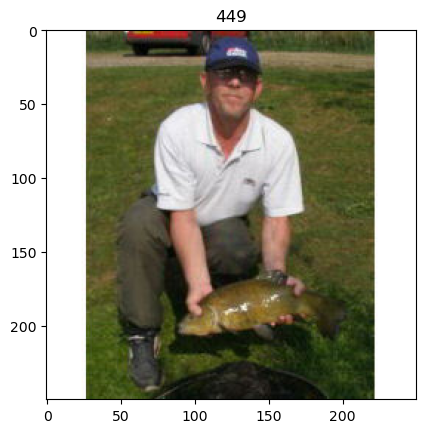

In [46]:
plt.imshow(img.transpose(1,2,0))
plt.title(label)        #tench